# Decision Tree Demo

This notebook demonstrates the implementation and usage of our Decision Tree algorithm. We'll compare it with scikit-learn's implementation and visualize the decision boundaries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTree

# Import our implementation
from decision_tree_classifier import CustomDecisionTreeClassifier

## 1. Generate Dataset

We'll use the moons dataset, which is a non-linear dataset that's good for demonstrating decision tree capabilities.

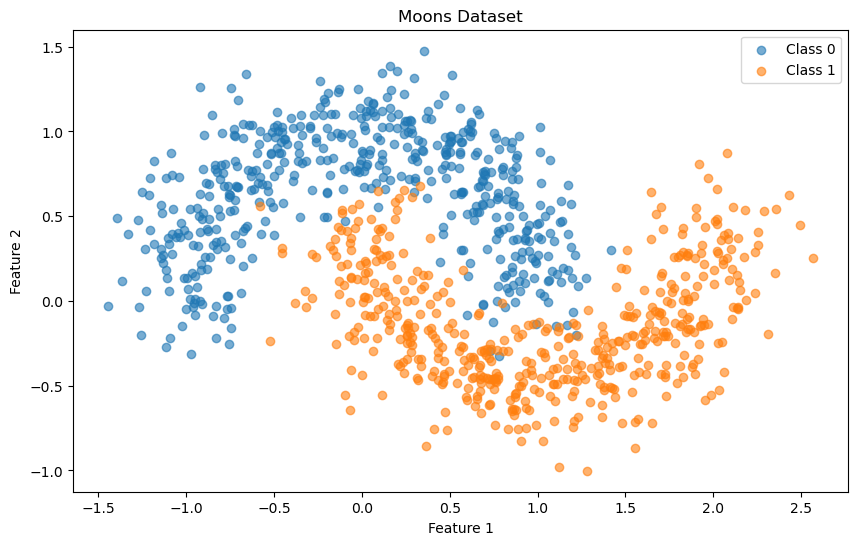

In [3]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.6)
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 2. Train Our Decision Tree

In [4]:
# Initialize and train our decision tree
our_tree = CustomDecisionTreeClassifier(max_depth=5)
our_tree.fit(X_train, y_train)

# Make predictions
our_predictions = our_tree.predict(X_test)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our Decision Tree Accuracy: {our_accuracy:.4f}")

Our Decision Tree Accuracy: 0.9650


## 3. Compare with scikit-learn Implementation

In [5]:
# Train scikit-learn's decision tree
sklearn_tree = SklearnDecisionTree(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)

# Make predictions
sklearn_predictions = sklearn_tree.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn Decision Tree Accuracy: {sklearn_accuracy:.4f}")

scikit-learn Decision Tree Accuracy: 0.9700


## 4. Visualize Decision Boundaries

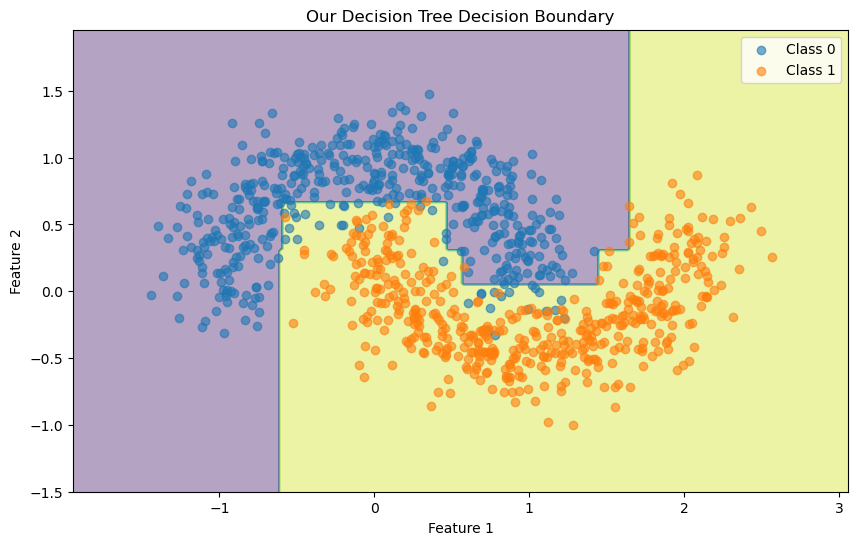

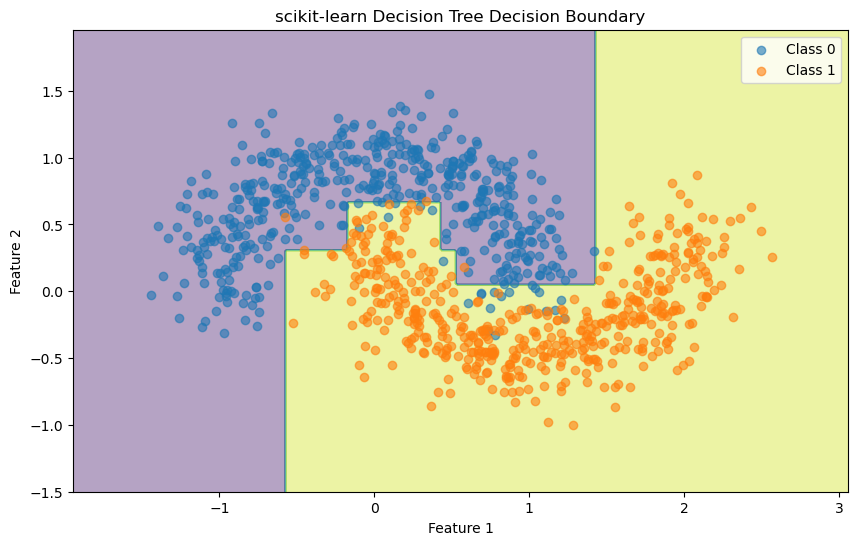

In [6]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.6)
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.6)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot decision boundaries for both implementations
plot_decision_boundary(our_tree, X, y, 'Our Decision Tree Decision Boundary')
plot_decision_boundary(sklearn_tree, X, y, 'scikit-learn Decision Tree Decision Boundary')

## 5. Confusion Matrix

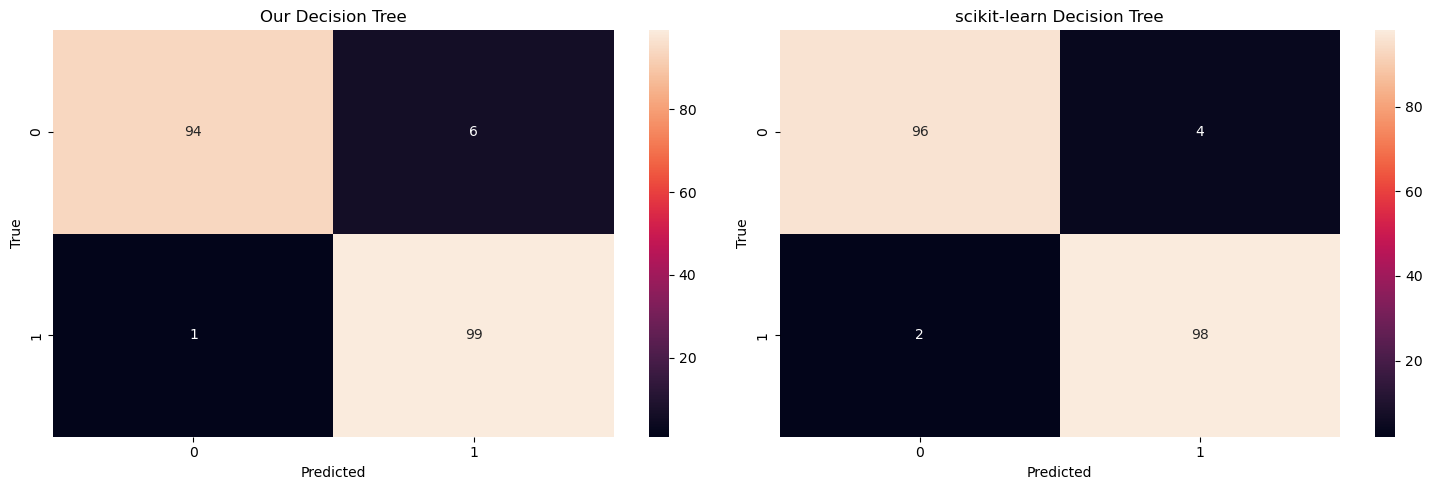

In [7]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Our implementation
cm_our = confusion_matrix(y_test, our_predictions)
sns.heatmap(cm_our, annot=True, fmt='d', ax=ax1)
ax1.set_title('Our Decision Tree')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# scikit-learn implementation
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=ax2)
ax2.set_title('scikit-learn Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## 6. Effect of Tree Depth

Let's see how the decision boundary changes with different tree depths.

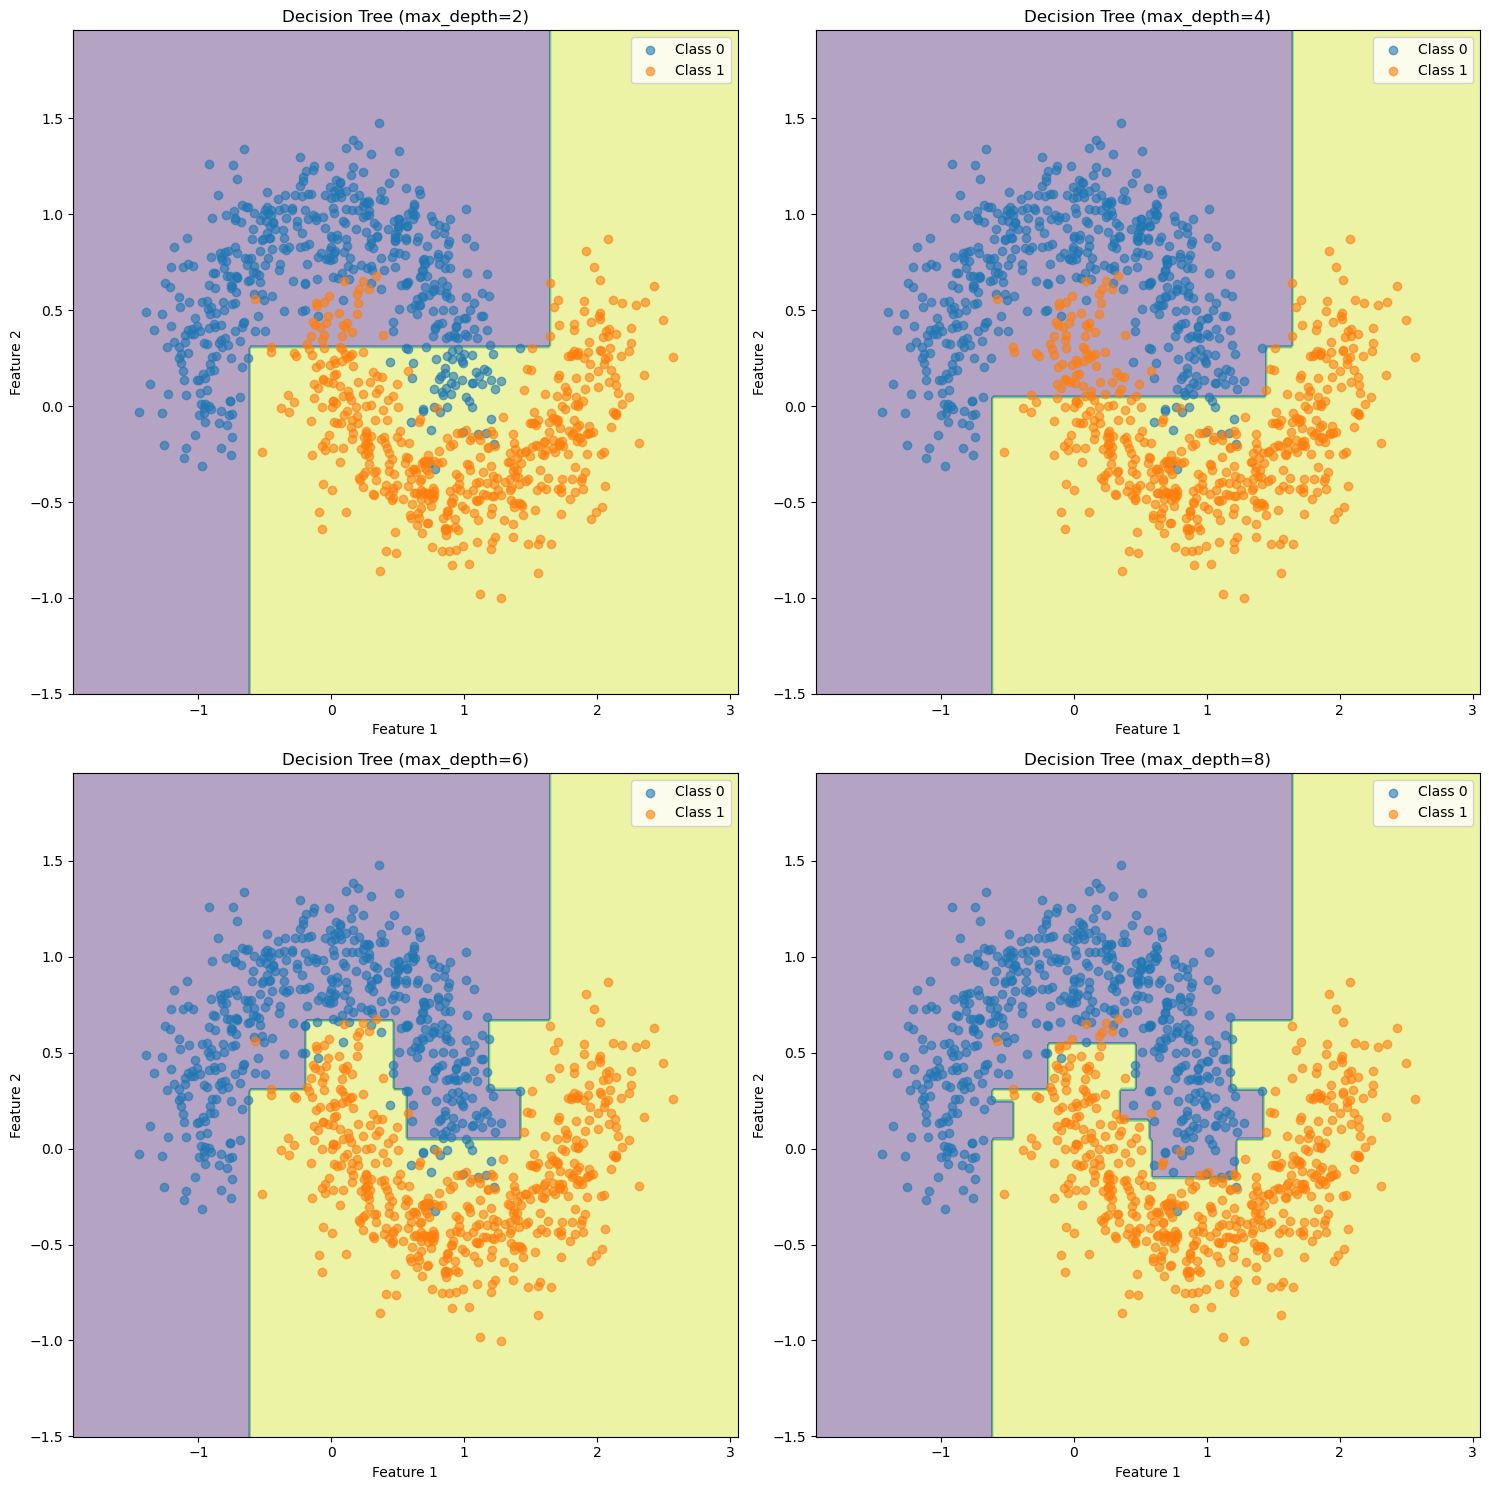

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv

In [9]:
# Train trees with different depths
depths = [2, 4, 6, 8]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, depth in enumerate(depths):
    tree = CustomDecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.4)
    axes[idx].scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.6)
    axes[idx].scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.6)
    axes[idx].set_title(f'Decision Tree (max_depth={depth})')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()

plt.tight_layout()
plt.show()